In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [4]:
# Function to calculate Euclidean distance
def distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))


In [5]:
# K-Means Clustering Implementation
def kmeans(data, k, max_iterations):
    centroids = data[np.random.choice(len(data), k, replace=False)]
    assignments = np.zeros(len(data))

    for _ in range(max_iterations):
        # Assign points to the nearest cluster
        for i, point in enumerate(data):
            distances_to_centroids = [distance(point, centroid) for centroid in centroids]
            assignments[i] = np.argmin(distances_to_centroids)

        # Update centroids
        for cluster in range(k):
            cluster_data = data[assignments == cluster]
            if len(cluster_data) > 0:  # Avoid division by zero
                centroids[cluster] = np.mean(cluster_data, axis=0)

    return centroids, assignments

In [6]:
# Load and preprocess the dataset
data = pd.read_csv("iris.csv")
features = list(data.columns)[1:3]  # Use only two features for visualization
X = data[features].values

In [7]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
# Parameters
k = 3
max_iterations = 100

In [9]:
# Run K-Means
centroids, assignments = kmeans(X, k, max_iterations)


In [10]:
# Prepare data for visualization
clustered_data = []
assignments = assignments.astype(int)  # Ensure assignments are integers
for i in range(k):
    clustered_data.append(X[assignments == i])


In [11]:
# Print cluster data
for i in range(k):
    print(f"\nCluster {i + 1} data points:")
    print(data.iloc[assignments == i])



Cluster 1 data points:
    sepal_length  sepal_width  petal_length  petal_width species
0            5.1          3.5           1.4          0.2  setosa
1            4.9          3.0           1.4          0.2  setosa
2            4.7          3.2           1.3          0.2  setosa
3            4.6          3.1           1.5          0.2  setosa
4            5.0          3.6           1.4          0.2  setosa
5            5.4          3.9           1.7          0.4  setosa
6            4.6          3.4           1.4          0.3  setosa
7            5.0          3.4           1.5          0.2  setosa
8            4.4          2.9           1.4          0.2  setosa
9            4.9          3.1           1.5          0.1  setosa
10           5.4          3.7           1.5          0.2  setosa
11           4.8          3.4           1.6          0.2  setosa
12           4.8          3.0           1.4          0.1  setosa
13           4.3          3.0           1.1          0.1  setosa
1

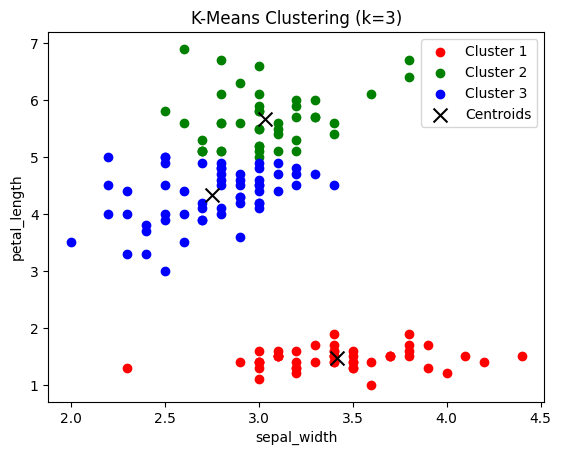

In [12]:
# Plot the results
colors = ['red', 'green', 'blue']
for i in range(k):
    plt.scatter(clustered_data[i][:, 0], clustered_data[i][:, 1], c=colors[i], label=f"Cluster {i + 1}")
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='black', label='Centroids')
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title(f"K-Means Clustering (k={k})")
plt.legend()
plt.show()

In [13]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X, assignments)
print(f"Silhouette Score: {silhouette_avg:.4f}")


Silhouette Score: 0.5931
